# Pymaceuticals Inc.
---

### Analysis

- At a high level, Capomulin, was effective in reducing the tumor size, as seen in the line graph of the tumor volume of a mouse over the timepoints. 
- Capomulin also does seem to be effective compared to other treatment regimens, with a lower median tumor size at the greatest timepoint (similar with Ramicane. However, it's difficult to say that Capomulin resulted in the greatest decrease in tumor size; to do so, we would have to compare the average decrease of tumor volume from the first timepoint between all regimens.
- There was an even distribution between male and female mice tested. Capomulin was tested with the most mice.
- There seems to be a significant positive correlation between mice weight and the tumor volume. The greater the weight, greater the size of the tumor.



 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined = study_results.join(mouse_metadata.set_index('Mouse ID'), on="Mouse ID", how="outer")
# Display the data table for preview

combined = combined.reset_index(drop=True)
combined


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [137]:
# Checking the number of mice.
number_of_mice = len(combined["Mouse ID"].value_counts())
number_of_mice

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined[combined.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
combined.loc[combined['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined[combined["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [13]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_std = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({
    'mean': tumor_mean,
    'median': tumor_median,
    'var': tumor_variance,
    'sem': tumor_sem
})

summary_df

,mean,median,var,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_df2 = pd.DataFrame({
    'mean': tumor_mean,
    'median': tumor_median,
    'var': tumor_variance,
    'std': tumor_std,
    'sem': tumor_sem
})

# Using the aggregation method, produce the same summary statistics in a single line.
clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

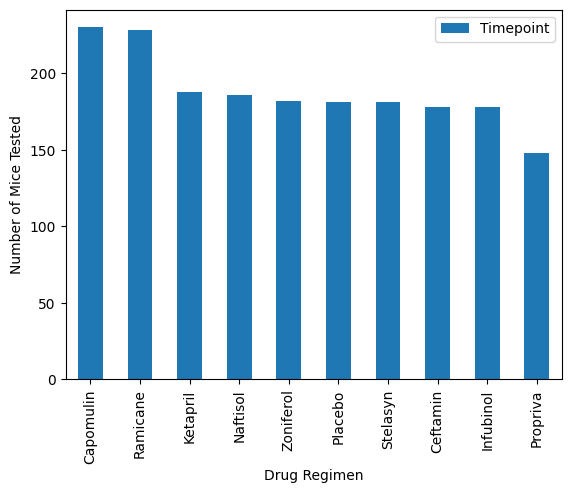

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_timepoint = clean_df.groupby("Drug Regimen").count()["Timepoint"].reset_index()
regimen_timepoint = regimen_timepoint.sort_values(by="Timepoint", ascending=False)

bar_plot = regimen_timepoint.plot(kind="bar", x="Drug Regimen")
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Mice Tested")

Text(0, 0.5, 'Number of Mice Tested')

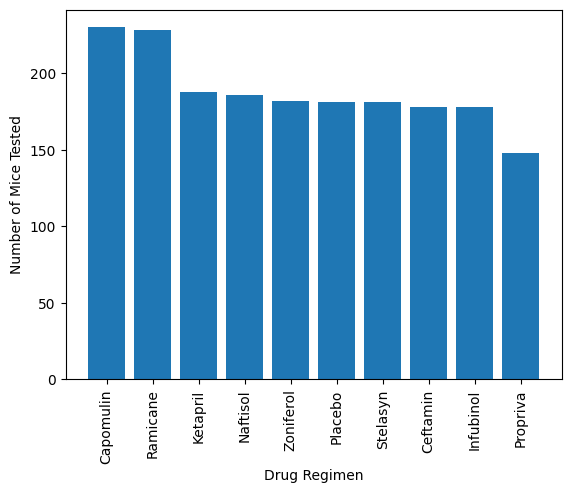

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(regimen_timepoint["Drug Regimen"], regimen_timepoint["Timepoint"])
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")

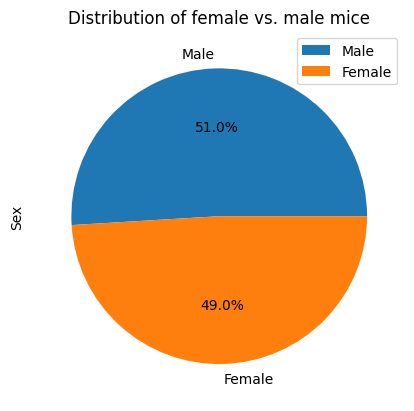

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_df = clean_df["Sex"].value_counts().to_frame()

pie_plot = mice_sex_df.plot(kind="pie", y="Sex", autopct='%1.1f%%', title="Distribution of female vs. male mice")


Text(0.5, 1.0, 'Distribution of female vs. male mice')

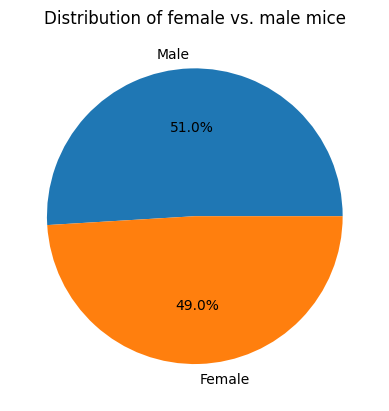

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(mice_sex_df["Sex"], labels=labels, autopct='%1.1f%%')
plt.title("Distribution of female vs. male mice")

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [138]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes

for drug in treatments:
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    # Determine outliers using upper and lower bounds

    
     # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
   


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc79456de80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc794562670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc79456d370>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc79430ebe0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc79430ee20>,
 'means': []}

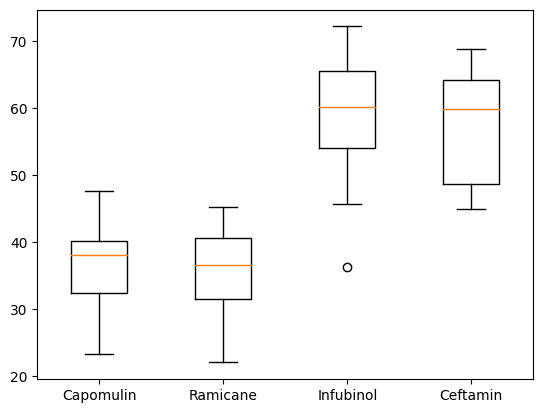

In [87]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

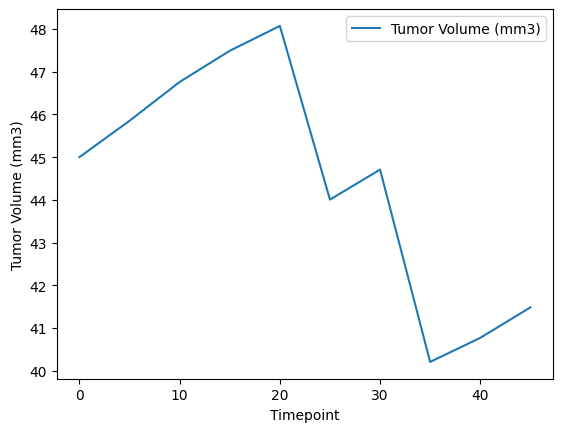

In [65]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
clean_df.loc[(clean_df["Mouse ID"] == "l509") & (clean_df["Drug Regimen"] == "Capomulin")][["Tumor Volume (mm3)", "Timepoint"]]

mousel509_data = clean_df.loc[(clean_df["Mouse ID"] == "l509") & (clean_df["Drug Regimen"] == "Capomulin")][["Tumor Volume (mm3)", "Timepoint"]]
mousel509_timepoint = mousel509_data["Timepoint"]
mousel509_tumor = mousel509_data["Tumor Volume (mm3)"]
mousel509_data = mousel509_data.set_index("Timepoint")

line_plot = mousel509_data.plot(kind="line")
line_plot.set_ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

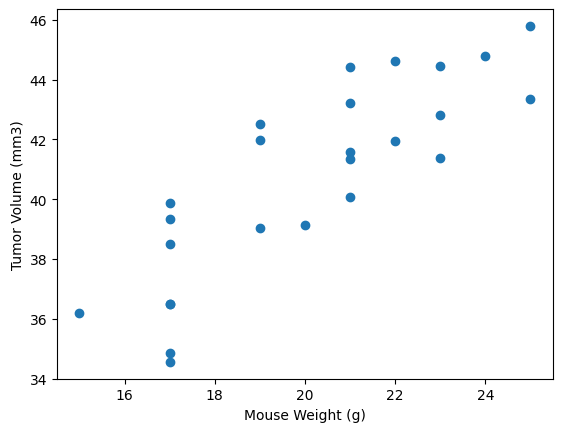

In [130]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_weight = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")].groupby("Mouse ID").mean()[["Tumor Volume (mm3)","Weight (g)"]]

plt.scatter(avg_tumor_weight["Weight (g)"], avg_tumor_weight["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

Correlation coefficient is:0.8419363424694721


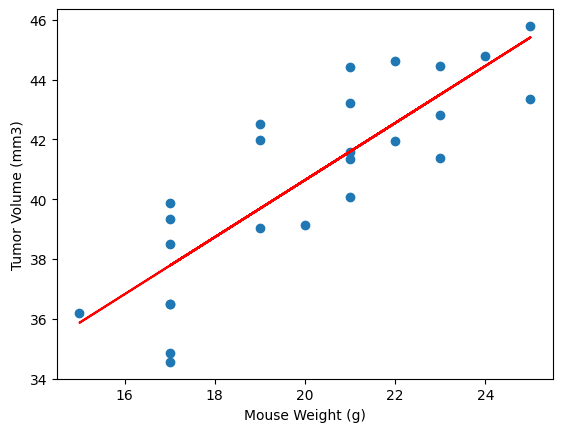

In [133]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_weight["Weight (g)"], avg_tumor_weight["Tumor Volume (mm3)"])
print(f"Correlation coefficient is:{r_value}")

plt.scatter(avg_tumor_weight["Weight (g)"], avg_tumor_weight["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(avg_tumor_weight["Weight (g)"], slope*(avg_tumor_weight["Weight (g)"])+intercept, color="red")

1.3225722434712404e-07